# Comparison of Various Methods

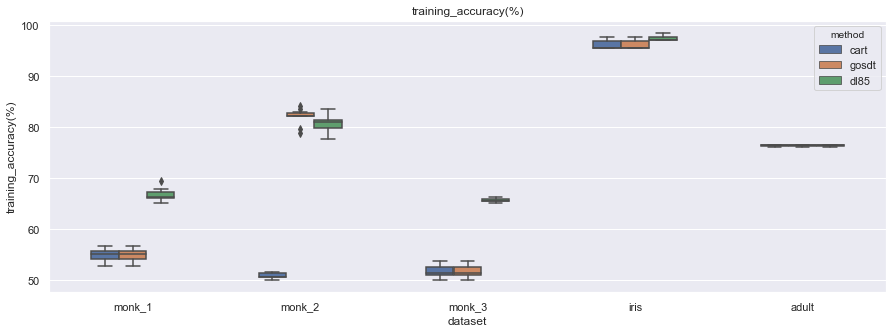

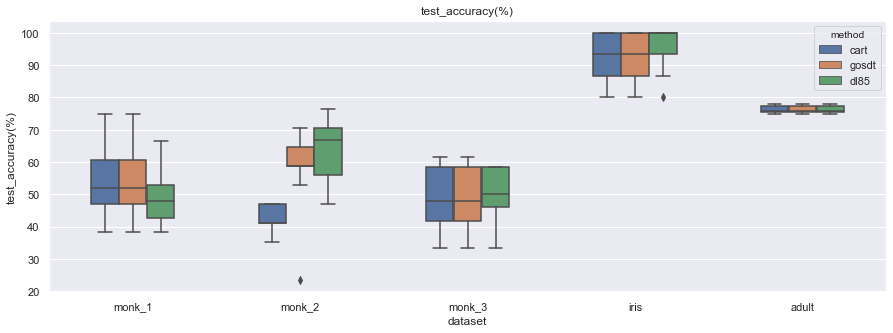

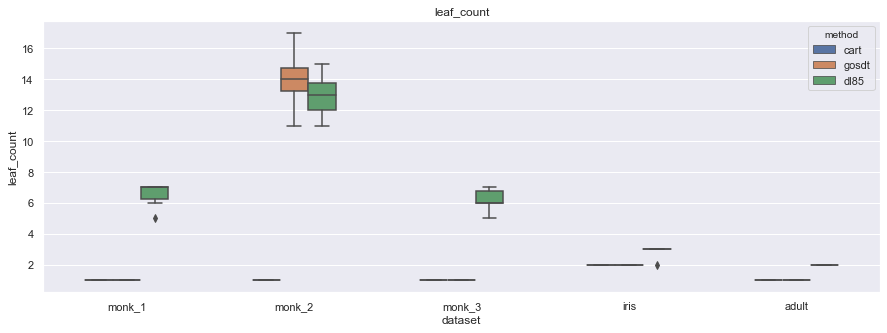

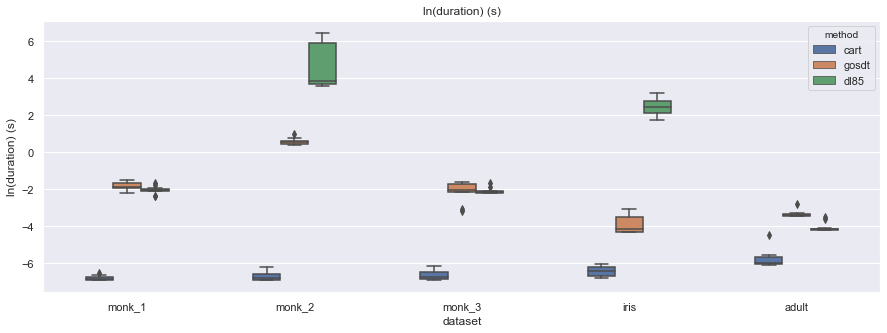

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import log
import pandas as pd
import numpy as np
import seaborn as sns
import re

methods = ['cart', 'gosdt', 'dl85']
metrics = ['training_accuracy(%)', 'test_accuracy(%)', 'leaf_count', 'duration(s)']
datasets = ['monk_1', 'monk_2', 'monk_3', 'iris', 'adult']

sample_size = 10
sns.set(rc={'figure.figsize':(15, 5)})
for metric in metrics:
    data = {'dataset': sum(([dataset] * sample_size for dataset in datasets), [])}
    for method in methods:
        values = []
        for dataset in datasets:
            segment = pd.DataFrame(pd.read_csv('../experiments/datasets/{}/{}.csv'.format(dataset, method), delimiter=","))[metric]
            if metric == "duration(s)":
                segment = segment.apply(lambda x : log(x))
                
            values += segment.to_list()
        data[method] = values
    if metric == "duration(s)":
        metric_label = "ln(duration) (s)"
    else:
        metric_label = metric
    data = pd.melt(pd.DataFrame(data), id_vars=['dataset'], value_vars=methods, var_name='method', value_name=metric_label)
    plot = sns.boxplot(data=data, x='dataset', y=metric_label, hue='method', width=0.5)
    plot.set_title('{}'.format(metric_label))
    plt.show()
